In [1]:
# 1. 导入函数工具箱
## 基础工具
import numpy as np
import pandas as pd
import warnings
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.special import jn
from IPython.display import display, clear_output
import time

warnings.filterwarnings('ignore')
%matplotlib inline

## 模型预测的
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor

## 数据降维处理的
from sklearn.decomposition import PCA,FastICA,FactorAnalysis,SparsePCA

import lightgbm as lgb
import xgboost as xgb

## 参数搜索和评价的
from sklearn.model_selection import GridSearchCV,cross_val_score,StratifiedKFold,train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
# 2.数据读取
# 通过对pandas对于数据进行读取（pandas是一个很友好的数据读取函数库）
Train_data = pd.read_csv('./input/used_car_train_20200313.csv',sep=' ')
TestB_data = pd.read_csv('./input/used_car_testB_20200421.csv',sep=' ')

# 输出数据的大小信息
print('Train data shape',Train_data.shape)
print('Test data shape',TestB_data.shape)

Train data shape (150000, 31)
Test data shape (50000, 30)


In [3]:
# 2.1数据简要浏览
# 通过.head()简要浏览数据的形式
Train_data.head()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,...,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,...,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,...,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,...,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,...,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482


In [4]:
# 2.2数据信息查看
# 通过.info()简要可以看到对应的一些数据列名，以及NAN缺失信息
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 31 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   SaleID             150000 non-null  int64  
 1   name               150000 non-null  int64  
 2   regDate            150000 non-null  int64  
 3   model              149999 non-null  float64
 4   brand              150000 non-null  int64  
 5   bodyType           145494 non-null  float64
 6   fuelType           141320 non-null  float64
 7   gearbox            144019 non-null  float64
 8   power              150000 non-null  int64  
 9   kilometer          150000 non-null  float64
 10  notRepairedDamage  150000 non-null  object 
 11  regionCode         150000 non-null  int64  
 12  seller             150000 non-null  int64  
 13  offerType          150000 non-null  int64  
 14  creatDate          150000 non-null  int64  
 15  price              150000 non-null  int64  
 16  v_

In [5]:
# 通过.columns查看列名
Train_data.columns

Index(['SaleID', 'name', 'regDate', 'model', 'brand', 'bodyType', 'fuelType',
       'gearbox', 'power', 'kilometer', 'notRepairedDamage', 'regionCode',
       'seller', 'offerType', 'creatDate', 'price', 'v_0', 'v_1', 'v_2', 'v_3',
       'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12',
       'v_13', 'v_14'],
      dtype='object')

In [6]:
TestB_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SaleID             50000 non-null  int64  
 1   name               50000 non-null  int64  
 2   regDate            50000 non-null  int64  
 3   model              50000 non-null  float64
 4   brand              50000 non-null  int64  
 5   bodyType           48496 non-null  float64
 6   fuelType           47076 non-null  float64
 7   gearbox            48032 non-null  float64
 8   power              50000 non-null  int64  
 9   kilometer          50000 non-null  float64
 10  notRepairedDamage  50000 non-null  object 
 11  regionCode         50000 non-null  int64  
 12  seller             50000 non-null  int64  
 13  offerType          50000 non-null  int64  
 14  creatDate          50000 non-null  int64  
 15  v_0                50000 non-null  float64
 16  v_1                500

In [7]:
#2.3数据统计信息浏览
# 通过.describe()可以查看数值特征列的一些统计信息
Train_data.describe()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
count,150000.000000,150000.000000,1.500000e+05,149999.000000,150000.000000,145494.000000,141320.000000,144019.000000,150000.000000,150000.000000,...,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,74999.500000,68349.172873,2.003417e+07,47.129021,8.052733,1.792369,0.375842,0.224943,119.316547,12.597160,...,0.248204,0.044923,0.124692,0.058144,0.061996,-0.001000,0.009035,0.004813,0.000313,-0.000688
std,43301.414527,61103.875095,5.364988e+04,49.536040,7.864956,1.760640,0.548677,0.417546,177.168419,3.919576,...,0.045804,0.051743,0.201410,0.029186,0.035692,3.772386,3.286071,2.517478,1.288988,1.038685
min,0.000000,0.000000,1.991000e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-9.168192,-5.558207,-9.639552,-4.153899,-6.546556
25%,37499.750000,11156.000000,1.999091e+07,10.000000,1.000000,0.000000,0.000000,0.000000,75.000000,12.500000,...,0.243615,0.000038,0.062474,0.035334,0.033930,-3.722303,-1.951543,-1.871846,-1.057789,-0.437034
50%,74999.500000,51638.000000,2.003091e+07,30.000000,6.000000,1.000000,0.000000,0.000000,110.000000,15.000000,...,0.257798,0.000812,0.095866,0.057014,0.058484,1.624076,-0.358053,-0.130753,-0.036245,0.141246
75%,112499.250000,118841.250000,2.007111e+07,66.000000,13.000000,3.000000,1.000000,0.000000,150.000000,15.000000,...,0.265297,0.102009,0.125243,0.079382,0.087491,2.844357,1.255022,1.776933,0.942813,0.680378
max,149999.000000,196812.000000,2.015121e+07,247.000000,39.000000,7.000000,6.000000,1.000000,19312.000000,15.000000,...,0.291838,0.151420,1.404936,0.160791,0.222787,12.357011,18.819042,13.847792,11.147669,8.658418


In [8]:
TestB_data.describe()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
count,50000.000000,50000.000000,5.000000e+04,50000.00000,50000.000000,48496.000000,47076.000000,48032.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,224999.500000,68505.606100,2.003401e+07,47.64948,8.087140,1.793736,0.376498,0.226953,119.766960,12.598260,...,0.248147,0.044624,0.124693,0.058198,0.062113,0.019633,0.002759,0.004342,0.004570,-0.007209
std,14433.901067,61032.124271,5.351615e+04,49.90741,7.899648,1.764970,0.549281,0.418866,206.313348,3.912519,...,0.045836,0.051664,0.201440,0.029171,0.035723,3.764095,3.289523,2.515912,1.287194,1.044718
min,200000.000000,1.000000,1.991000e+07,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-9.119719,-5.662163,-8.291868,-4.157649,-6.098192
25%,212499.750000,11315.000000,1.999100e+07,11.00000,1.000000,0.000000,0.000000,0.000000,75.000000,12.500000,...,0.243436,0.000035,0.062519,0.035413,0.033880,-3.675196,-1.963928,-1.865406,-1.048722,-0.440706
50%,224999.500000,52215.000000,2.003091e+07,30.00000,6.000000,1.000000,0.000000,0.000000,110.000000,15.000000,...,0.257818,0.000801,0.095880,0.056804,0.058749,1.632134,-0.375537,-0.138943,-0.036352,0.136849
75%,237499.250000,118710.750000,2.007110e+07,66.00000,13.000000,3.000000,1.000000,0.000000,150.000000,15.000000,...,0.265263,0.101654,0.125470,0.079387,0.087624,2.846205,1.263451,1.775632,0.945239,0.685555
max,249999.000000,196808.000000,2.015121e+07,246.00000,39.000000,7.000000,6.000000,1.000000,19211.000000,15.000000,...,0.291176,0.153403,1.411559,0.157458,0.211304,12.177864,18.789496,13.384828,5.635374,2.649768


In [9]:
# 3.特征与标签构建
# 3.1提取数值类特征列名
numerical_cols = Train_data.select_dtypes(exclude='object').columns
print(numerical_cols)

Index(['SaleID', 'name', 'regDate', 'model', 'brand', 'bodyType', 'fuelType',
       'gearbox', 'power', 'kilometer', 'regionCode', 'seller', 'offerType',
       'creatDate', 'price', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6',
       'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13', 'v_14'],
      dtype='object')


In [10]:
categorical_cols = Train_data.select_dtypes(include='object').columns
print(categorical_cols)

Index(['notRepairedDamage'], dtype='object')


In [22]:
# 3.2构建训练和测试样本
# 选择特征列
feature_cols = [col for col in numerical_cols if col not in ['SaleID','name','regDate','creatDate','price','model','brand','regionCode','seller']]
feature_cols = [col for col in feature_cols if 'Type' not in col]
print(feature_cols)

# 提前特征列，标签列构造训练样本和测试样本
X_data = Train_data[feature_cols]
print(X_data.head())
Y_data = Train_data['price']

X_test = TestB_data[feature_cols]

print('X train shape:',X_data.shape)
print('X test shape:',X_test.shape)

['gearbox', 'power', 'kilometer', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13', 'v_14']
   gearbox  power  kilometer        v_0       v_1       v_2       v_3  \
0      0.0     60       12.5  43.357796  3.966344  0.050257  2.159744   
1      0.0      0       15.0  45.305273  5.236112  0.137925  1.380657   
2      0.0    163       12.5  45.978359  4.823792  1.319524 -0.998467   
3      1.0    193       15.0  45.687478  4.492574 -0.050616  0.883600   
4      0.0     68        5.0  44.383511  2.031433  0.572169 -1.571239   

        v_4       v_5       v_6       v_7       v_8       v_9      v_10  \
0  1.143786  0.235676  0.101988  0.129549  0.022816  0.097462 -2.881803   
1 -1.422165  0.264777  0.121004  0.135731  0.026597  0.020582 -4.900482   
2 -0.996911  0.251410  0.114912  0.165147  0.062173  0.027075 -4.846749   
3 -2.228079  0.274293  0.110300  0.121964  0.033395  0.000000 -4.509599   
4  2.246088  0.228036  0.073205  0.091880 

In [23]:
# 定义了一个统计函数，方便后续信息统计
def Sta_inf(data):
    print('_min:',np.min(data))
    print('_max:',np.max(data))
    print('_mean:',np.mean(data))
    print('_ptp:',np.ptp(data))
    print('_stad:',np.std(data))
    print('_var:',np.var(data))

In [24]:
# 统计标签的基本分布信息
print('Sta of label:')
Sta_inf(Y_data)

Sta of label:
_min: 11
_max: 99999
_mean: 5923.327333333334
_ptp: 99988
_stad: 7501.973469876635
_var: 56279605.942732885


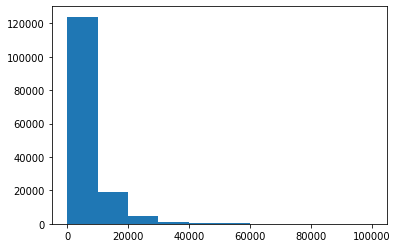

In [25]:
# 绘制标签的统计图，查看标签分布
plt.hist(Y_data)
plt.show()
# 新窗口打开一幅图像,显示图像
plt.close()
# 关闭图

In [28]:
# 缺省值用-1填补
X_data = X_data.fillna(-1)
X_test = X_test.fillna(-1)
X_data.info()
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 18 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   gearbox    150000 non-null  float64
 1   power      150000 non-null  int64  
 2   kilometer  150000 non-null  float64
 3   v_0        150000 non-null  float64
 4   v_1        150000 non-null  float64
 5   v_2        150000 non-null  float64
 6   v_3        150000 non-null  float64
 7   v_4        150000 non-null  float64
 8   v_5        150000 non-null  float64
 9   v_6        150000 non-null  float64
 10  v_7        150000 non-null  float64
 11  v_8        150000 non-null  float64
 12  v_9        150000 non-null  float64
 13  v_10       150000 non-null  float64
 14  v_11       150000 non-null  float64
 15  v_12       150000 non-null  float64
 16  v_13       150000 non-null  float64
 17  v_14       150000 non-null  float64
dtypes: float64(17), int64(1)
memory usage: 20.6 MB
<class 'pandas.co

## Xgboost优势
1.正则化，减少过拟合
2.并行处理。相比GBM有了速度提升，算法是顺序处理的。也支持Hadoop
3.高度灵活性。允许用户自定义优化目标和评价标准，对模型增加了全新的纬度，处理不受任何限制
4.缺失值处理。内置处理缺失值规则，用户需要提供一个和其他样本不同的值，作为参数传进去
5.剪枝。分裂遇到一个负损失，GBM会停止分裂，GBM是一个贪心算法。XGBoost会一只分裂到指定的最大深度，然后回过头来剪枝，如果某个节点之后不再有正值，它会去除这个分裂。这种优点是，当一个负损失后有一个正损失的时候，就体现出来了。
6.内置交叉验证。允许在每一轮boosting迭代中使用交叉验证，可以方便的获得最优boosting迭代次数
7.在已有的模型基础上继续。可以在上一轮的结果上继续训练。

## xgb.XGBRegressor参数
* n_estimators 迭代次数（太小欠拟合，太大过拟合）
* learning_rate 集成模型时，要乘以一个小数，避免过拟合，默认0.05
* gamma 在树的叶节点上进行进一步分区所需的最小损失减少。越大gamma，算法将越保守
* subsample 默认值1，训练实例的子样本比率。将其设置为0.5意味着XGBoost将在树木生长之前随机采样一半的训练数据。
  这样可以防止过度拟合。二次采样将在每个增强迭代中进行一次。范围：（0,1]
* colsample_bytree  是构造每棵树时列的子采样率。对每一个构造的树进行一次二次采样。范围为（0，1]，默认值为1
* max_depth [默认= 6]一棵树的最大深度。增加此值将使模型更复杂，并且更可能过度拟合。仅lossguided当tree_method设置为hist并且表示深度没有限制时，
  才在增长策略中接受0 。注意，训练一棵深树时，XGBoost会大量消耗内存。
调参的顺序：
1、选定一组基准参数，这些参数有经验的话，用经验值，没有经验可以用官方的默认值 
2 、max_depth 和 min_child_weight 参数调优 
3、gamma参数调优 
4、调整subsample 和 colsample_bytree 参数调优 
5、正则化参数调优（reg_alpha、reg_lambda 6、降低学习率和使用更多的树（learning_rate、n_estimators） 
7、可以探索的参数max_delta_step 、scale_pos_weight、base_score

In [38]:
## 4.模型训练与预测
# 4.1利用xgb进行五折交叉验证查看模型的参数效果
# xgb-model
xgr = xgb.XGBRegressor(n_estimators=120, learning_rate=0.1, gamma=0, subsample=0.8,\
                      colsamle_bytree=0.9, max_depth=7)# ,objective='reg:squarederror'
scores_train = []
scores = []

# 5折交叉验证方法
sk = StratifiedKFold(n_splits=5,shuffle=True,random_state=0)
# n_splits:折叠次数，默认为3，至少为2。
# shuffle:是否在每次分割之前打乱顺序。
# random_state:随机种子，在shuffle==True时使用，默认使用np.random。
# 函数：split(X, y):
# X:array-like,shape(n_sample,n_features)，训练数据集。
# y:array-like,shape(n_sample)，标签。
# 返回值：训练集数据的index与验证集数据的index。

for train_ind,val_ind in sk.split(X_data,Y_data):
    train_x = X_data.iloc[train_ind].values
    train_y = Y_data.iloc[train_ind]
    
    val_x = X_data.iloc[val_ind].values
    val_y = Y_data.iloc[val_ind]
    
    xgr.fit(train_x,train_y)
    pred_train_xgb = xgr.predict(train_x)
    pred_xgb=xgr.predict(val_x)
    
    score_train = mean_absolute_error(train_y,pred_train_xgb)
    scores_train.append(score_train)
    score = mean_absolute_error(val_y,pred_xgb)
    scores.append(score)
    
print('Train mae:',np.mean(score_train))
print('Val mae:',np.mean(scores))

Train mae: 619.0079837334365
Val mae: 716.7105899527327


In [17]:
# 4.2 定义xgb和lgb模型函数
def build_model_xgb(x_train,y_train):
    model = xgb.XGBRegressor(n_estimators=150, learning_rate=0.1, gamma=0, subsample=0.8,\
                            colsample_bytree=0.9, max_depth=7) # objective='reg:squaredrror'
    model.fit(x_train,y_train)
    return model

def build_model_lgb(x_train,y_train):
    estimator = lgb.LGBMRegressor(num_leaves=127,n_estimators=150)
    param_grid = {
        'learning_rate':[0.01,0.05,0.1,0.2],
    }
    gbm = GridSearchCV(estimator,param_grid)
    # GridSearchCV 自动调参，只要把参数输进去，就能给出最优化的结果和参数，适合于小数据集
    # 数据集上去了，可以使用坐标下降。一种贪心算法。拿当前对模型影响最大的参数调优，直到最优化；再拿下一个影响最大的参数调优，如此下去，直到所有的参数调整完毕。
    # 这个方法的缺点就是可能会调到局部最优而不是全局最优，但是省时间省力。，后续可以再拿bagging再优化
    gbm.fit(x_train,y_train)
    return gbm

In [18]:
# 4.3切分数据机(Train,Val)进行模型训练，评价和预测
# Split data with Val
x_train,x_val,y_train,y_val= train_test_split(X_data,Y_data,test_size=0.3)
# train_test_split 随机划分训练集和验证集

In [19]:
print('Train lgb...')
model_lgb = build_model_lgb(x_train,y_train)
val_lgb = model_lgb.predict(x_val)
MAE_lgb = mean_absolute_error(y_val,val_lgb)
print('MAE of val with lgb:',MAE_lgb)

print('Pridict lgb...')
model_lgb_pre = build_model_lgb(X_data,Y_data)
subA_lgb = model_lgb_pre.predict(X_test)
print('Sta of Predict lgb:')
Sta_inf(subA_lgb)

Train lgb...
MAE of val with lgb: 695.5574777673921
Pridict lgb...
Sta of Predict lgb:
_min: -589.8793550785414
_max: 90760.26063584947
_mean: 5906.935218383807
_ptp: 91350.13999092802
_stad: 7344.644970956768
_var: 53943809.749400534


In [20]:
print('Train xgb...')
model_xgb = build_model_xgb(x_train,y_train)
val_xgb = model_xgb.predict(x_val)
MAE_xgb = mean_absolute_error(y_val,val_xgb)
print('MAE of val with xgb:',MAE_xgb)

print('Predict xgb...')
model_xgb_pre = build_model_xgb(X_data,Y_data)
subA_xgb = model_xgb_pre.predict(X_test)
print('Sta of Predict xgb:')
Sta_inf(subA_xgb)

Train xgb...
MAE of val with xgb: 718.554365758378
Predict xgb...
Sta of Predict xgb:
_min: -317.39026
_max: 92074.53
_mean: 5910.889
_ptp: 92391.92
_stad: 7349.9707
_var: 54022068.0


In [21]:
# 4.4 进行两模型的结果加权融合
#这里我们采用了简单的加权融合方式
val_Weighted = (1-MAE_lgb/(MAE_xgb+MAE_lgb))*val_lgb+(1-MAE_xgb/(MAE_xgb+MAE_lgb))*val_xgb
val_Weighted[val_Weighted<0]=10# 由于我们发现预测的最小值有负数，而真是情况下，price为负是不存在的，由此我嗯进行对应的后修正
print('MAE of val with Weithted ensemble:',mean_absolute_error(y_val,val_Weighted))

MAE of val with Weithted ensemble: 690.7323812824217


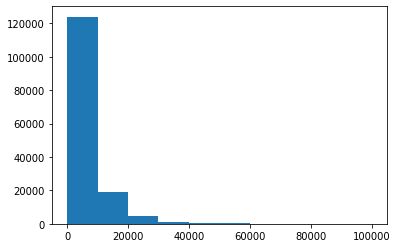

In [22]:
sub_Weighted = (1-MAE_lgb/(MAE_xgb+MAE_lgb))*subA_lgb +(1-MAE_xgb/(MAE_xgb+MAE_lgb))*subA_xgb

#查看预测值的统计进行
plt.hist(Y_data)
plt.show()
plt.close()

In [23]:
# 4.5输出结果
sub = pd.DataFrame()
sub['SaleId'] = X_test.index
sub['price'] = sub_Weighted
sub.to_csv('./output/sub_Weighted1.csv',index=False)

In [24]:
sub.head()

,SaleId,price
0,0,1193.283182
1,1,1696.865737
2,2,8420.907432
3,3,1315.863472
4,4,2057.992246
